Digite o tipo de teste (unilateral ou bilateral):  bilateral
Digite o nível de significância (entre 0 e 1):  0.05


O valor da estatística de teste é igual a 2.5936
A confiança do teste é igual a 0.95
O valor crítico da distribuição associada é igual a 2.2622
A hipótese nula 'A média das indenizações é igual a $1.000,00' deve ser rejeita-se a afirmação.


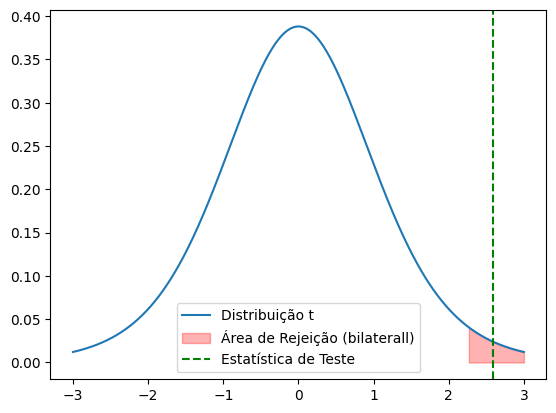

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Coletar os dados das indenizações
indenizacoes = np.array([1033, 1069, 1274, 1121, 1114, 1269, 924, 1150, 1421, 921])

# Solicitar o tipo de teste ao usuário
tipo_teste = input("Digite o tipo de teste (unilateral ou bilateral): ")

# Definir a hipótese nula e alternativa
hipotese_nula = "A média das indenizações é igual a $1.000,00"
hipotese_alternativa = "A média das indenizações é superior a $1.000,00"

# Nível de significância fornecido pelo usuário
alpha = float(input("Digite o nível de significância (entre 0 e 1): "))

# Calcular a estatística de teste e o valor crítico
media_amostra = np.mean(indenizacoes)
desvio_padrao_amostra = np.std(indenizacoes, ddof=1)  # ddof=1 para usar a estimativa não viciada
n = len(indenizacoes)

# Se o teste for unilateral
if tipo_teste.lower() == "unilateral":
    estatistica_teste = (media_amostra - 1000) / (desvio_padrao_amostra / np.sqrt(n))
    valor_critico = stats.t.ppf(1 - alpha, df=n - 1)
    if estatistica_teste > valor_critico:
        resultado = "rejeita-se a afirmação"
    else:
        resultado = "aceita-se a afirmação"

# Se o teste for bilateral
elif tipo_teste.lower() == "bilateral":
    estatistica_teste = (media_amostra - 1000) / (desvio_padrao_amostra / np.sqrt(n))
    valor_critico = stats.t.ppf(1 - alpha/2, df=n - 1)
    if abs(estatistica_teste) > valor_critico:
        resultado = "rejeita-se a afirmação"
    else:
        resultado = "aceita-se a afirmação"

# Plotar o gráfico da distribuição da estatística de teste e valor crítico
x = np.linspace(-3, 3, 1000)
y = stats.t.pdf(x, df=n - 1)
plt.plot(x, y, label="Distribuição t")
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.3, label=f"Área de Rejeição ({tipo_teste}l)")
plt.axvline(estatistica_teste, color='green', linestyle='--', label="Estatística de Teste")
plt.legend()

# Imprimir os resultados
print(f"O valor da estatística de teste é igual a {estatistica_teste:.4f}")
print(f"A confiança do teste é igual a {1-alpha:.2f}")
print(f"O valor crítico da distribuição associada é igual a {valor_critico:.4f}")
print(f"A hipótese nula '{hipotese_nula}' deve ser {resultado}.")

# Mostrar o gráfico
plt.show()


Digite o tipo de teste (unilateral ou bilateral):  unilateral
Digite o nível de significância (entre 0 e 1):  0.05


O valor da estatística de teste é igual a 20.0000
A confiança do teste é igual a 0.95
O valor crítico da distribuição associada é igual a 7.8147
A hipótese de que a marca C é preferida sobre as outras três marcas combinadas deve ser rejeita-se a afirmação.


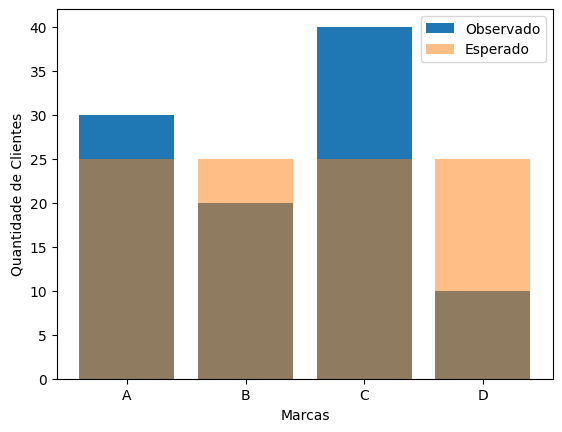

In [17]:
import pandas as pd
import numpy as np
from scipy import stats

# Defina os dados da tabela
data = {'Marca': ['A', 'B', 'C', 'D'],
        'Quantidade': [30, 20, 40, 10]}

# Crie um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Solicitar o tipo de teste ao usuário
tipo_teste = input("Digite o tipo de teste (unilateral ou bilateral): ")

# Nível de significância fornecido pelo usuário
alpha = float(input("Digite o nível de significância (entre 0 e 1): "))

# Observações totais
total_obs = df['Quantidade'].sum()

# Calcula as frequências esperadas, assumindo que não há preferência por nenhuma marca
esperado = total_obs / len(df['Marca'])

# Calcula a estatística de qui-quadrado
qui_quadrado = np.sum((df['Quantidade'] - esperado) ** 2 / esperado)

# Graus de liberdade
graus_liberdade = len(df['Marca']) - 1

# Calcula o valor crítico da distribuição qui-quadrado
valor_critico = stats.chi2.ppf(1 - alpha, df=graus_liberdade)

# Determina se a hipótese nula deve ser rejeitada
if tipo_teste.lower() == "unilateral":
    if qui_quadrado > valor_critico:
        resultado = "rejeita-se a afirmação"
    else:
        resultado = "aceita-se a afirmação"
elif tipo_teste.lower() == "bilateral":
    if qui_quadrado > valor_critico or qui_quadrado < -valor_critico:
        resultado = "rejeita-se a afirmação"
    else:
        resultado = "aceita-se a afirmação"

# Imprime os resultados
print(f"O valor da estatística de teste é igual a {qui_quadrado:.4f}")
print(f"A confiança do teste é igual a {1 - alpha:.2f}")
print(f"O valor crítico da distribuição associada é igual a {valor_critico:.4f}")
print(f"A hipótese de que a marca C é preferida sobre as outras três marcas combinadas deve ser {resultado}.")

plt.bar(df['Marca'], df['Quantidade'], label="Observado")
plt.bar(df['Marca'], [esperado] * len(df['Marca']), alpha=0.5, label="Esperado")

plt.xlabel("Marcas")
plt.ylabel("Quantidade de Clientes")
plt.legend()

# Mostrar o gráfico
plt.show()
